## Car price prediction

#### Import neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E:/ML projects/17.Car price prediction/dataset/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.dtypes[df.dtypes == object]

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'are:',df[col].unique())
    print('-'*75)

Unique items in column Car_Name are: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'B

In [9]:
for col in df[['Fuel_Type','Seller_Type','Transmission']]:
    print(df[col].value_counts())
    print('-'*75)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
---------------------------------------------------------------------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
---------------------------------------------------------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
---------------------------------------------------------------------------


In [10]:
df['Owner'].unique()


array([0, 1, 3])

#### checking for null values

In [11]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.drop(['Car_Name'],axis = 1,inplace = True)

In [13]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [16]:
df['Current_Year'] = 2024

In [17]:

df['Number_Of_Years'] = df['Current_Year'] - df['Year']

In [18]:

df.drop(['Year','Current_Year'],axis = 1,inplace = True)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [20]:

df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [21]:
def Encode(df,variable):
    encoded_Variable = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(encoded_Variable)

In [22]:

for col in df[['Fuel_Type','Seller_Type','Transmission']]:
    Encode(df,col)

In [23]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,239,195,261,0,10
1,4.75,9.54,43000,60,195,261,0,11
2,7.25,9.85,6900,239,195,261,0,7
3,2.85,4.15,5200,239,195,261,0,13
4,4.60,6.87,42450,60,195,261,0,10


#### EDA

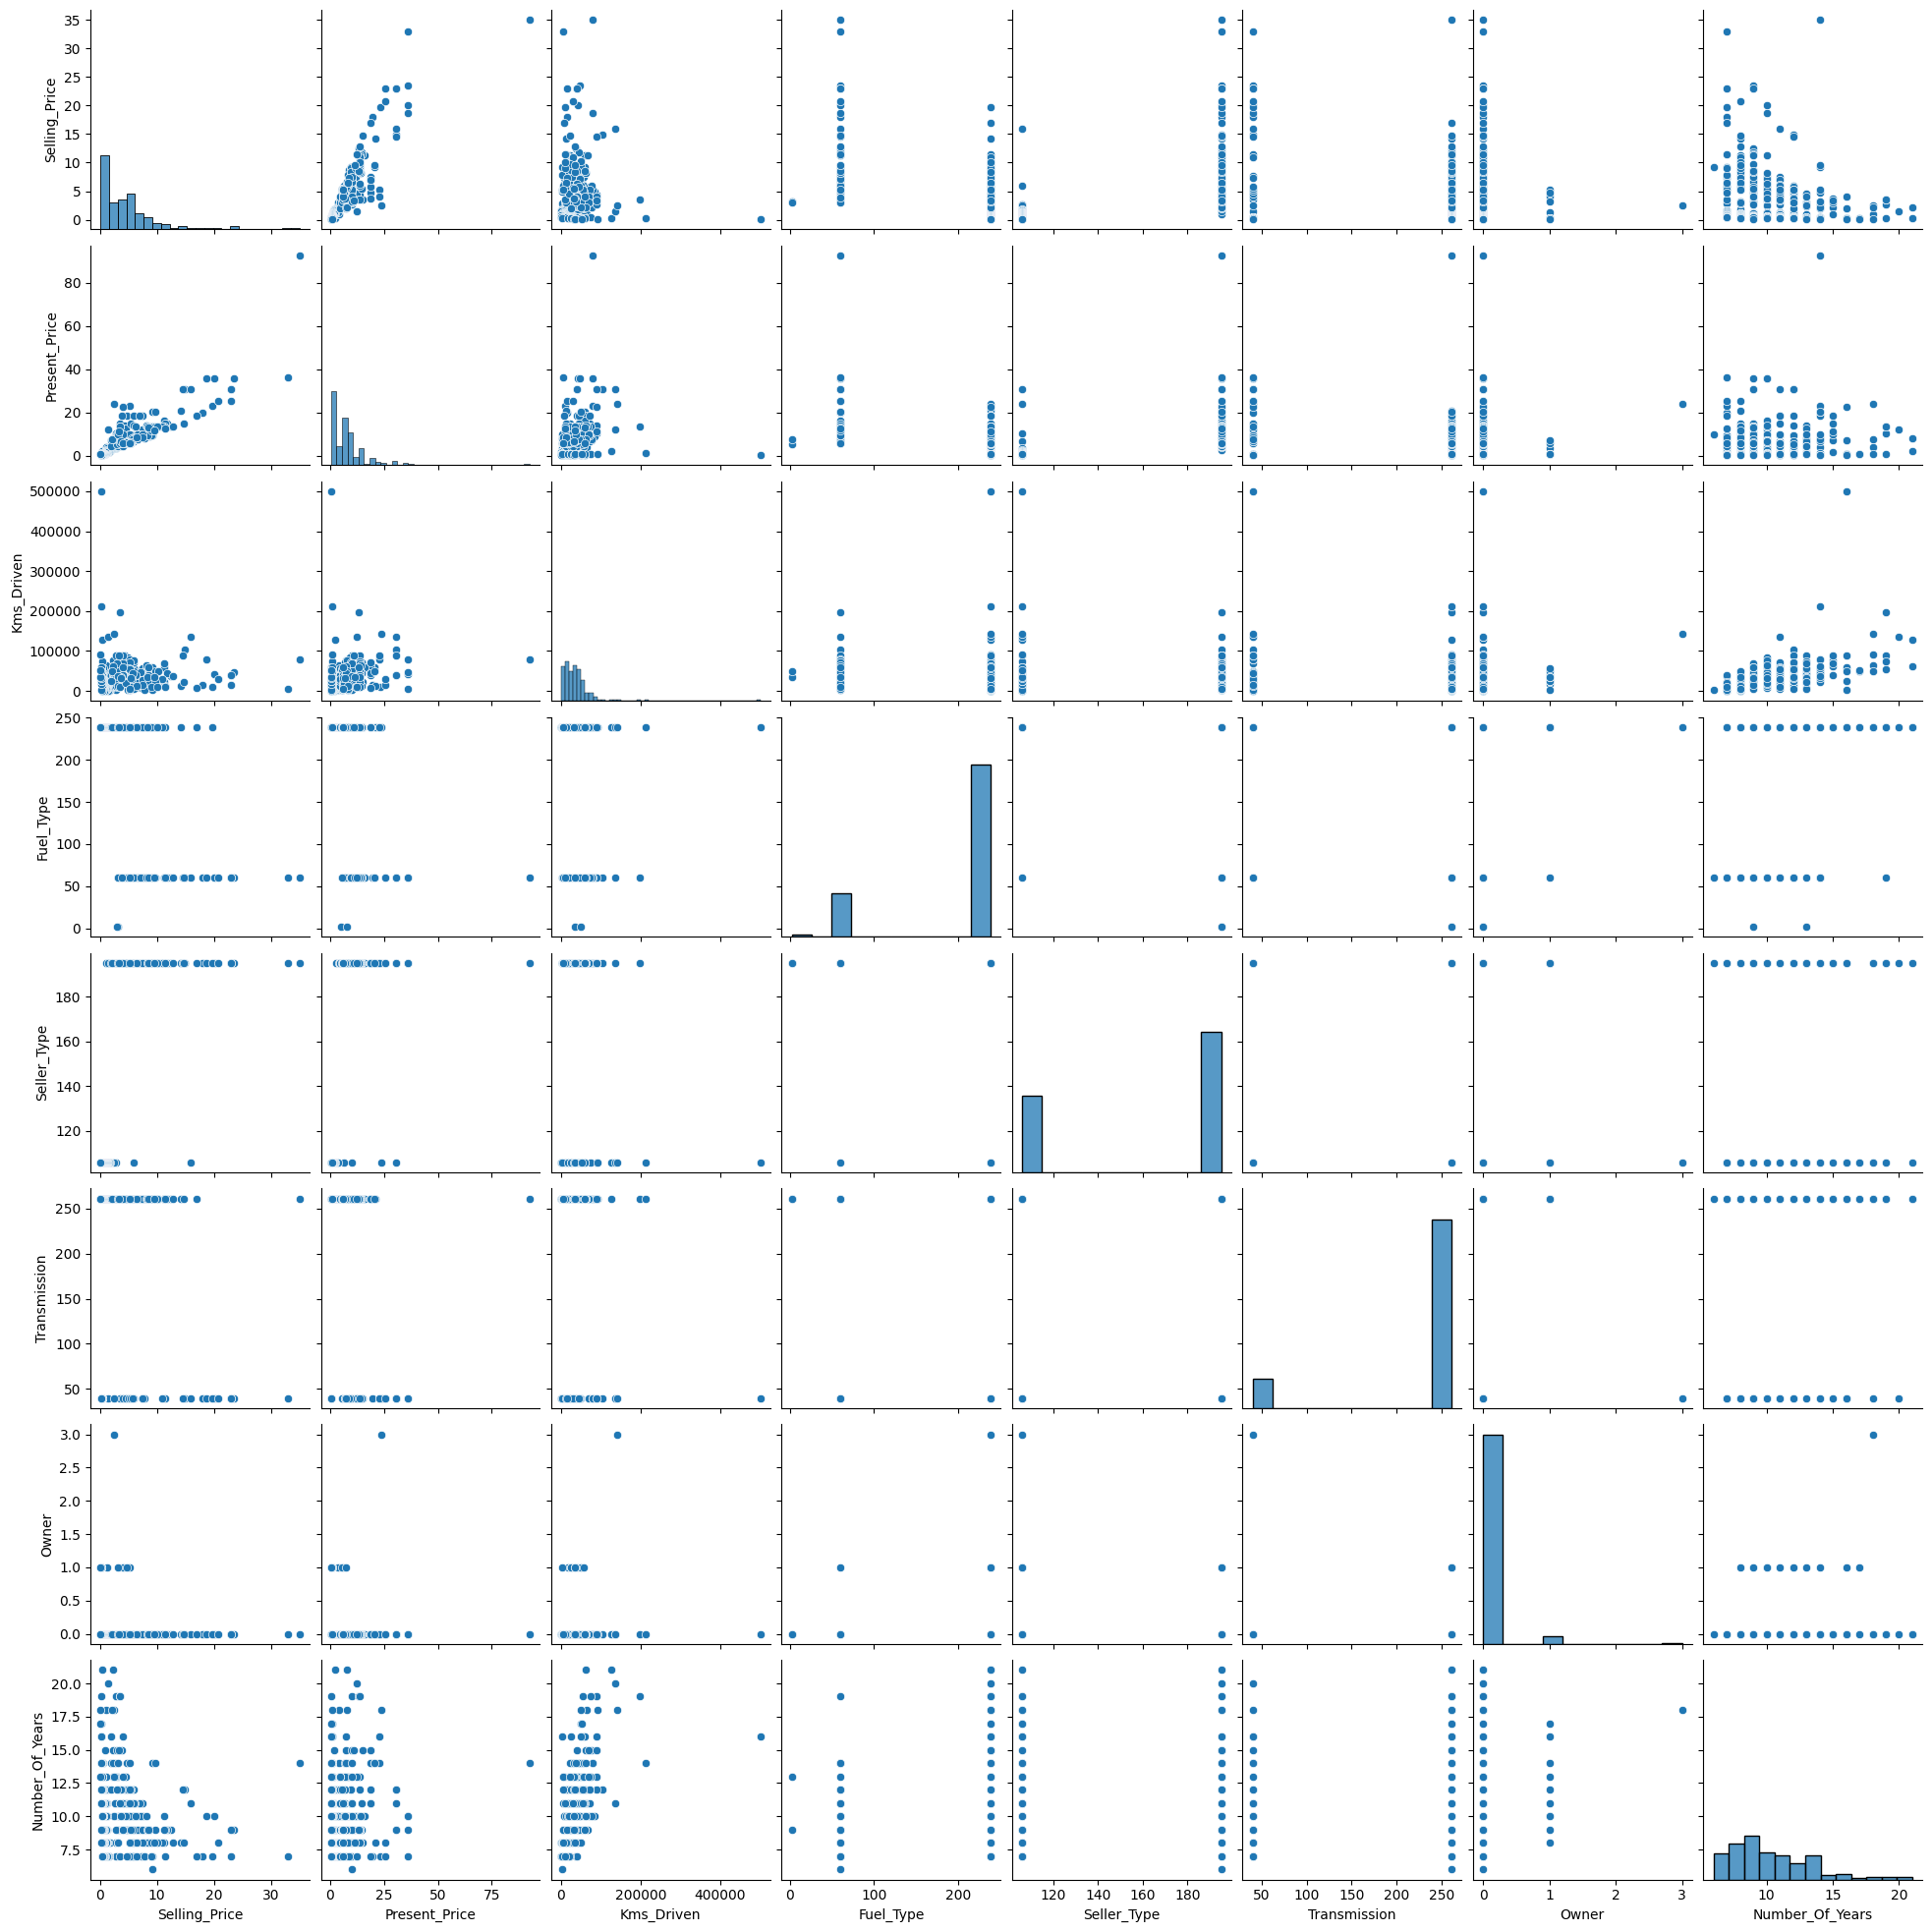

In [24]:
sns.pairplot(df)

In [25]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,239,195,261,0,10
1,4.75,9.54,43000,60,195,261,0,11
2,7.25,9.85,6900,239,195,261,0,7
3,2.85,4.15,5200,239,195,261,0,13
4,4.60,6.87,42450,60,195,261,0,10


<Axes: xlabel='Present_Price', ylabel='Count'>

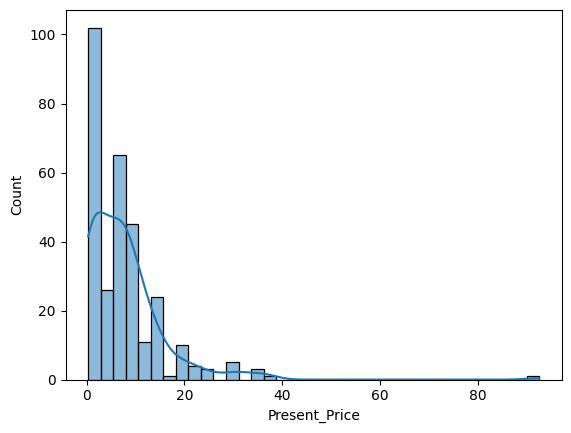

In [30]:
sns.histplot(x='Present_Price',data=df,kde=True)

<Axes: xlabel='Selling_Price', ylabel='Count'>

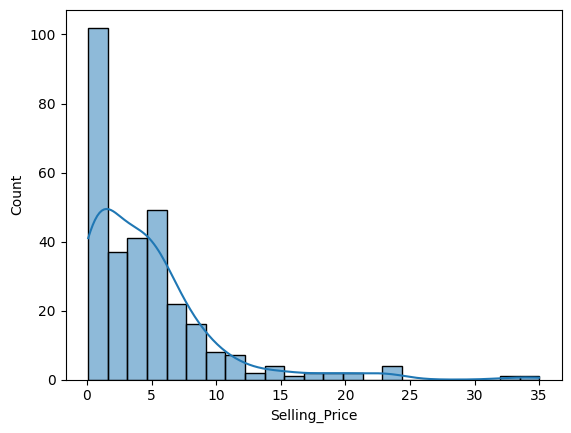

In [31]:
sns.histplot(x='Selling_Price',data=df,kde=True)

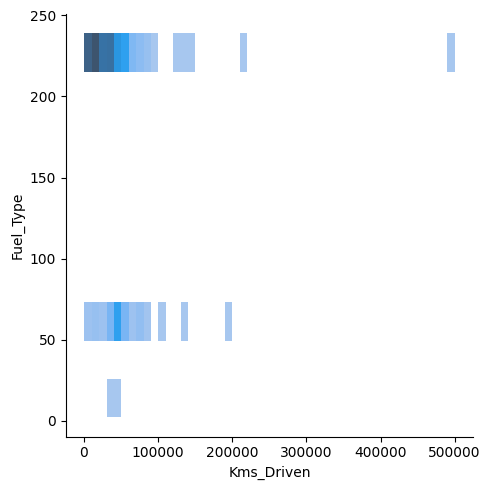

In [34]:
sns.displot(x='Kms_Driven',y='Fuel_Type',data=df)

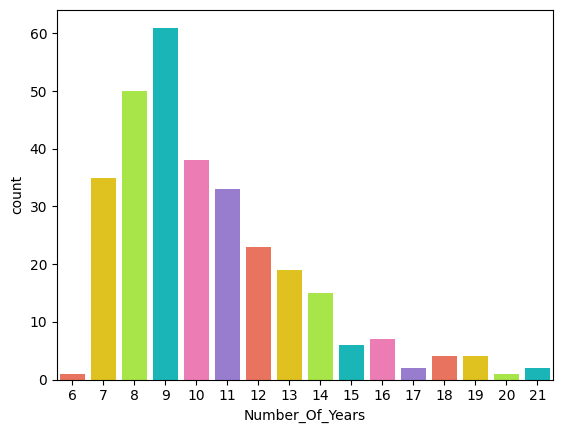

In [38]:
colors = ["#FF6347", "#FFD700", "#ADFF2F", "#00CED1", "#FF69B4", "#9370DB"]
sns.countplot(x='Number_Of_Years', data=df, palette=colors)

# Show plot
plt.show()

<Axes: >

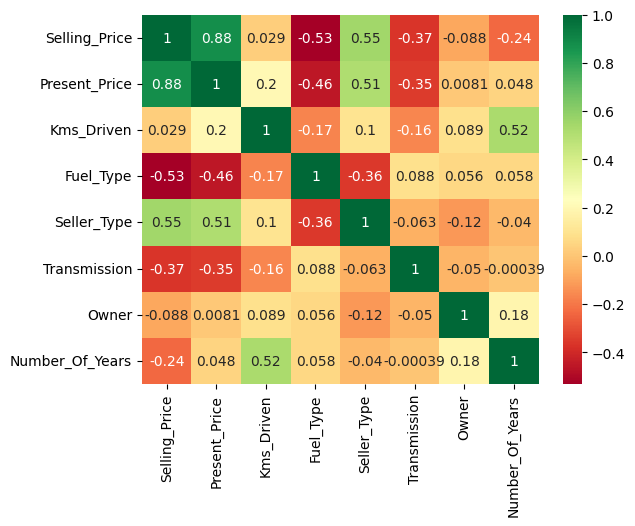

In [40]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

#### Independent and dependent features

In [43]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [44]:
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,5.59,27000,239,195,261,0,10
1,9.54,43000,60,195,261,0,11
2,9.85,6900,239,195,261,0,7
3,4.15,5200,239,195,261,0,13
4,6.87,42450,60,195,261,0,10
...,...,...,...,...,...,...,...
296,11.60,33988,60,195,261,0,8
297,5.90,60000,239,195,261,0,9
298,11.00,87934,239,195,261,0,15
299,12.50,9000,60,195,261,0,7


In [45]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

#### Splitting data for training and testing  

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Standardization

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
scaler

StandardScaler()

In [49]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [50]:
x_train.shape,x_test.shape

((240, 7), (61, 7))

#### Model training

#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("R squared value : ",r2_score(y_test,y_pred))
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("mean absolute error : ",mean_absolute_error(y_test,y_pred))

R squared value :  0.8924488062550247
mean squared error :  2.477504613770491
mean absolute error :  0.9622786885245905


#### Linear Reression

In [53]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("R squared value : ",r2_score(y_test,y_pred))
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("mean absolute error : ",mean_absolute_error(y_test,y_pred))

R squared value :  0.8433676863504194
mean squared error :  3.6081168996835267
mean absolute error :  1.3169256007114825
